In [59]:
import numpy as np
import pandas as pd
df = pd.read_csv("GDP by Country 1999-2022.csv", sep=',', header=0, thousands=",")
df.set_index("Country", inplace=True)
df = df.T
print(f"Dataframe has {df.shape[0]} rows and {df.shape[1]} columns")


Dataframe has 23 rows and 180 columns


In [16]:
df.head()

Country,"Afghanistan, Rep. of.",Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,"Yemen, Republic of",Zambia,Zimbabwe
1999,0.000,3.444,48.845,6.153,0.652,283.523,1.845,401.782,213.390,4.581,...,1467.03,9268.43,20.913,17.041,0.251,97.977,28.684,7.530,3.132,5.963
2000,0.000,3.695,54.749,9.135,0.678,284.204,1.912,390.017,194.407,5.273,...,1445.19,9816.98,20.086,13.717,0.245,117.153,31.196,9.561,3.238,8.136
2001,0.000,4.096,55.181,8.936,0.710,268.697,2.118,368.191,193.345,5.708,...,1435.63,10127.95,18.561,11.632,0.235,122.872,32.504,9.533,3.640,12.883
2002,4.084,4.456,57.053,11.386,0.718,97.732,2.376,412.901,208.566,6.236,...,1574.47,10469.60,12.089,9.657,0.230,92.889,35.148,9.985,3.775,30.856
2003,4.585,5.600,68.013,13.956,0.754,127.643,2.807,527.588,255.842,7.276,...,1814.64,10960.75,11.211,10.129,0.280,83.442,39.630,11.869,4.326,10.515


In [65]:
China = df['China'].head(9).to_numpy()
Canada = df['Canada'].head(9).to_numpy()
Switzerland = df['Switzerland'].head(9).to_numpy()
South_Korea = df['Korea'].head(9).to_numpy()
Sweden = df['Sweden'].head(9).to_numpy()
Norway = df['Norway'].head(9).to_numpy()
Denmark = df['Denmark'].head(9).to_numpy()
Finland = df['Finland'].head(9).to_numpy()
New_Zealand = df['New Zealand'].head(9).to_numpy()
Australia = df['Australia'].head(9).to_numpy()

In [66]:
weights = np.linalg.solve(np.column_stack((Canada,Switzerland,South_Korea,Sweden,Norway,Denmark,Finland,New_Zealand,Australia)), China)

In [67]:
column_names = ['x_' + str(i) for i in range(1, 10)]
df[column_names] = weights

In [68]:
df['synthetic GDP']=df['Canada']*df['x_1']+df['Switzerland']*df['x_2']+df['Korea']*df['x_3']+df['Sweden']*df['x_4']+df['Norway']*df['x_5']+df['Denmark']*df['x_6']+df['Finland']*df['x_7']+df['New Zealand']*df['x_8']+df['Australia']*df['x_9']

In [69]:
change_in_synthetic_GDP=df.at['2009', 'synthetic GDP'] - df.at['2007', 'synthetic GDP']
change_in_China_GDP=df.at['2009', 'China'] - df.at['2007', 'China']
DID=change_in_China_GDP-change_in_synthetic_GDP
print(DID)

2947.7354880535236


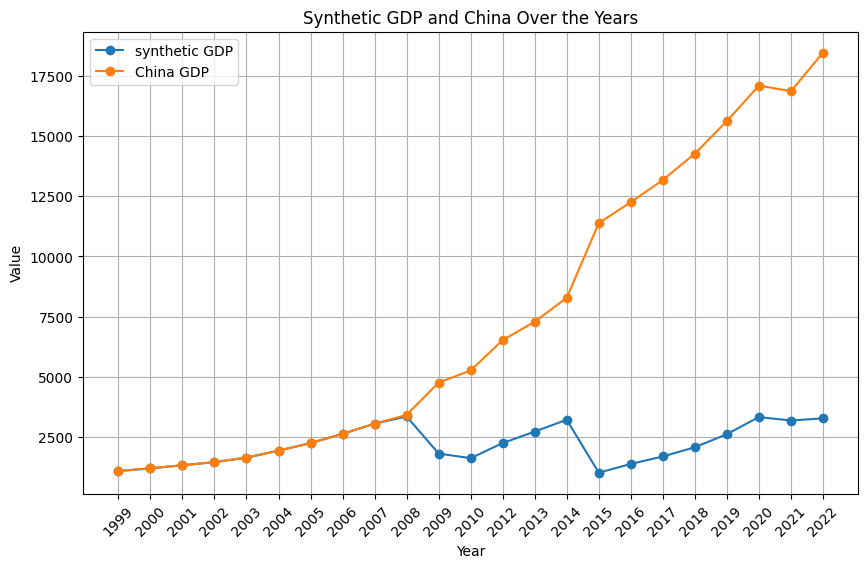

In [74]:
import matplotlib.pyplot as plt

# Extract data for 'synthetic GDP' and 'China' columns
years = df.index
synthetic_gdp = df['synthetic GDP']
china = df['China']

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, synthetic_gdp, label='synthetic GDP', marker='o', linestyle='-')
plt.plot(years, china, label='China GDP', marker='o', linestyle='-')

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Synthetic GDP and China Over the Years')
plt.legend()
plt.xticks(rotation=45)
# Show the graph
plt.grid(True)
plt.show()